**LOGISTIC REGRESSION**

## Logistic Regression is commonly used to estimate the probability that an  instance belongs to a particular class.If the estimated probability is greater than 50% then the model predicts that the instance belongs to that class(*called the positive class ,labeled as '1')* or else it predict that it does not 
(*that is it belongs to the negative class ,labeled as 'o' )*.This make it a binary classifier 

**Equation of Logistic Regression is **
 Y= Wt x + B
 i.e y is equal to W to the power of t plus b


 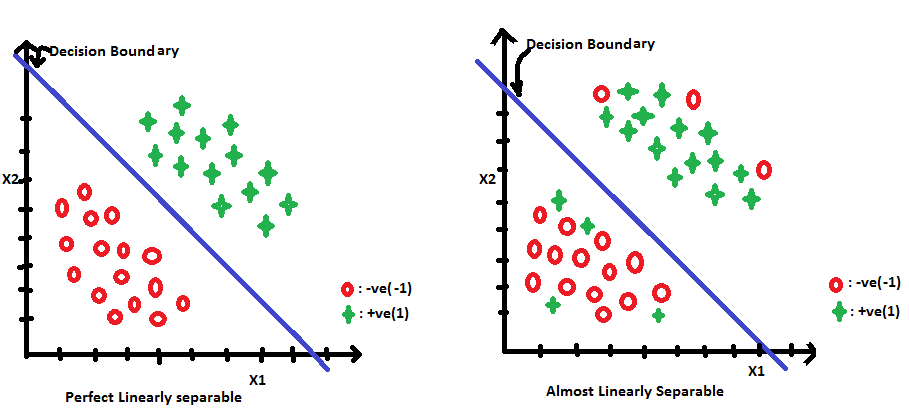

#### Now lets consider above figure .

### where red is our negative class. 
### And green is our positive class


**Step to calculate best fit line**
* consider our line is passing through origin then our b(intercept) will be zero
  and equation will be Y=Wt * X
* Now in linear algebra if you want to calculate the distance between point and plane 
* Distance between plane and point
* 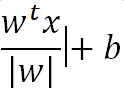  

* Since we assume our line is passing through origin then our b=0
* 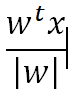

* And if we consider W as a unit vector then |w|=1
*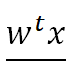
 
* Now we have many data point around the plane then our equation will be
* 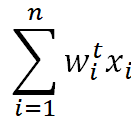
 
* The sum of distance between all the point and plane

* Points above the plane are positive points(green=postive)
* Distance of green points from the plane will be positive 
* Points below the plane are negative points(red=negative)
* Distance of red points from the plane will be negative

**CASE-1**
* Lets calculate the distance of green point(which is above the plane) form the plane
* Suppose "A" is that point and green line indicate the distance between plane and point "A"
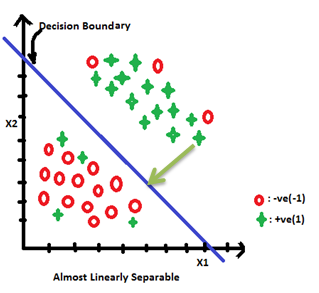

* point "A" is positive and distance between plane and point is positive (above the plane)
*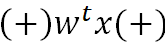 
* In above equation you can see that distance is positive and point is also positive
*  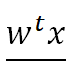
* The product of this multiplication will always greater than zero i.e value will positive always that's means correctly classified 

**CASE-2**
* Lets calculate the distance of red point(which is below the plane) form the plane
* Suppose "B" is that point and red line indicate the distance between plane and point "B"
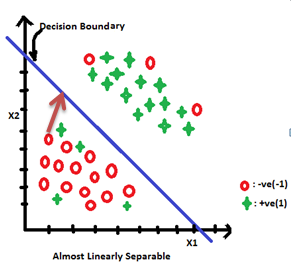
* point "B" is negative and distance between plane and point is negative (below the plane)
* 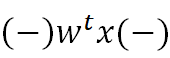
* In above eqaution point is negative and distance is negative .So negative negative become positve 
* 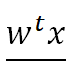
* The product of this multiplication will always greater than zero i.e value will positive always that's means correctly classified 

**CASE-3**
*  Lets calculate the distance of red point(which is above the plane) form the plane
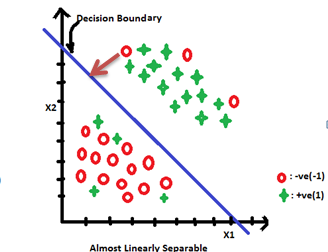
* Suppose "C" is that point And red line indicate the distance between plane and point
* Now here point "C" is negative because its belong to negative class.And distance is positive because its above the plane 
* 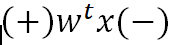 

* In above equation distance is positive and point is negactive And negative positive become negative
* 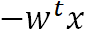
* The product of this multiplication will always less than zero i.e value will negative always .That's means  point is  misclassified 

**CASE-4**
* Lets calculate the distance of green point(which is below the plane) form the plane
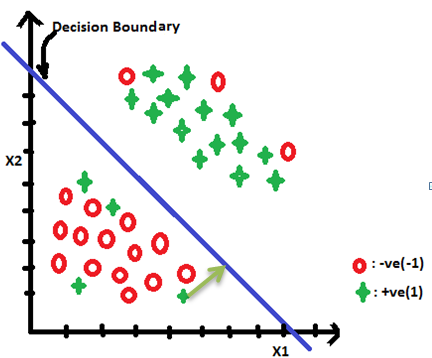
* Suppose "D" is that point And green line indicate the distance between plane and point
* Now here point "D" is positive because its belong to positive class.And distance is negative because its below the plane
* 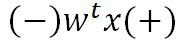
* In above equation point is positive and distance is negative.And positive negative become negative.
* 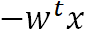
* The product of this multiplication will always less than zero i.e value will negative always. That's means point is   misclassified 

**Conclusion**
* cost function should be maximum
* The summation of all the points along with the distance should be maximum
* Because whenever its greater than zero the classification is correct
* whenever value is negative it does misclassification

**COST FUNCTION**
![](costfun.png)

* Yi is the distance
* wT is coefficient
* Xi is data point 

* We have to update this weigth(wT) untill and unless we get maximum of the summation
* whichever weigth will give you maxuimum summation of all the points that particular line will your best line that line will linearly classify both  classifications


**What if we have outlier**

![](out2.png)

* In above figure we have two classses red one(ve-) and blue one(ve+).
* And a plane 
* consider the distance between plane and the point for both classes is 2. For negative class its -2 and for positive class its 2
* consider magnitude of all point is 1.For negative class its -1 and for positive class its 1 
* we have one outlier in positive class which is belong to negative class i.e point "O".And the distance between plane and point "O" is 500
* According to cost function we will do summation of all point  

**summation of product of all point and distance**

![](cal.png)
* Now due to the impact of outlier all positive class points getting missclassified and negative class points are correctly classified.
* Now this is because of outlier which is from negative class

**Now we will change the best fit line**
![](gph.png)
* This figure is same as above figure just plane(best fit line) is changed.
* Consider distance between plane and points which is above the plane(positive) is like 1,2,3,4,5 for positive class and for negative -1,-2,-3,-4,-5
* Consider magnitude of all point is 1.For negative class its -1 and for positive class its 1
* For point "O" distanse is -2 and magnitude is -1

**summation of product of all point and distance**
![](cal2.png) 
* Now all positive class points getting correctly classified and 5 missclassification is there for negative class
* But our cost function is postive which is greater than 0 so algorithm will select this line as a best fit line
* Both lines/plane have missclassification .To resolve this problem we will use sigmoid function

**SIGMOID FUNCTION**
* This fuction will scale the values of cost function in between 0 to 1
**Formula**
![](sfun.png)
* It will reduce the effect of outlier 


![](costfun.jpg)

## To predict whether a person will have diabetes or not.

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Load the data
data=pd.read_csv('diabetes1.csv')#https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Basic Checks 

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Domain Analysis.

### Exploratory Data Analysis

In [8]:
#Step 1 Univariate Analysis
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: xlabel='Pregnancies', ylabel='count'>

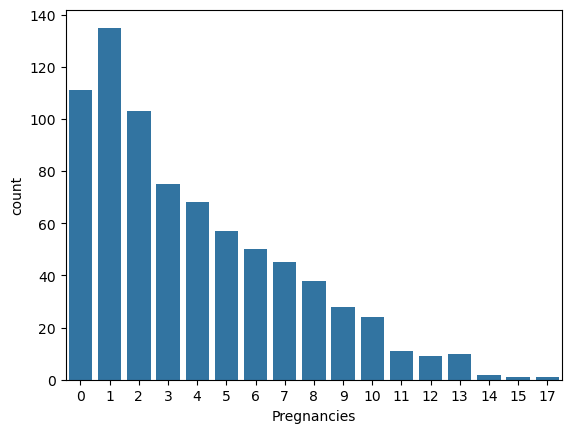

In [6]:
sns.countplot(x='Pregnancies',data=data)
# Maximum patients have conceived  1 and 0 times.

In [10]:
data.Pregnancies.value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

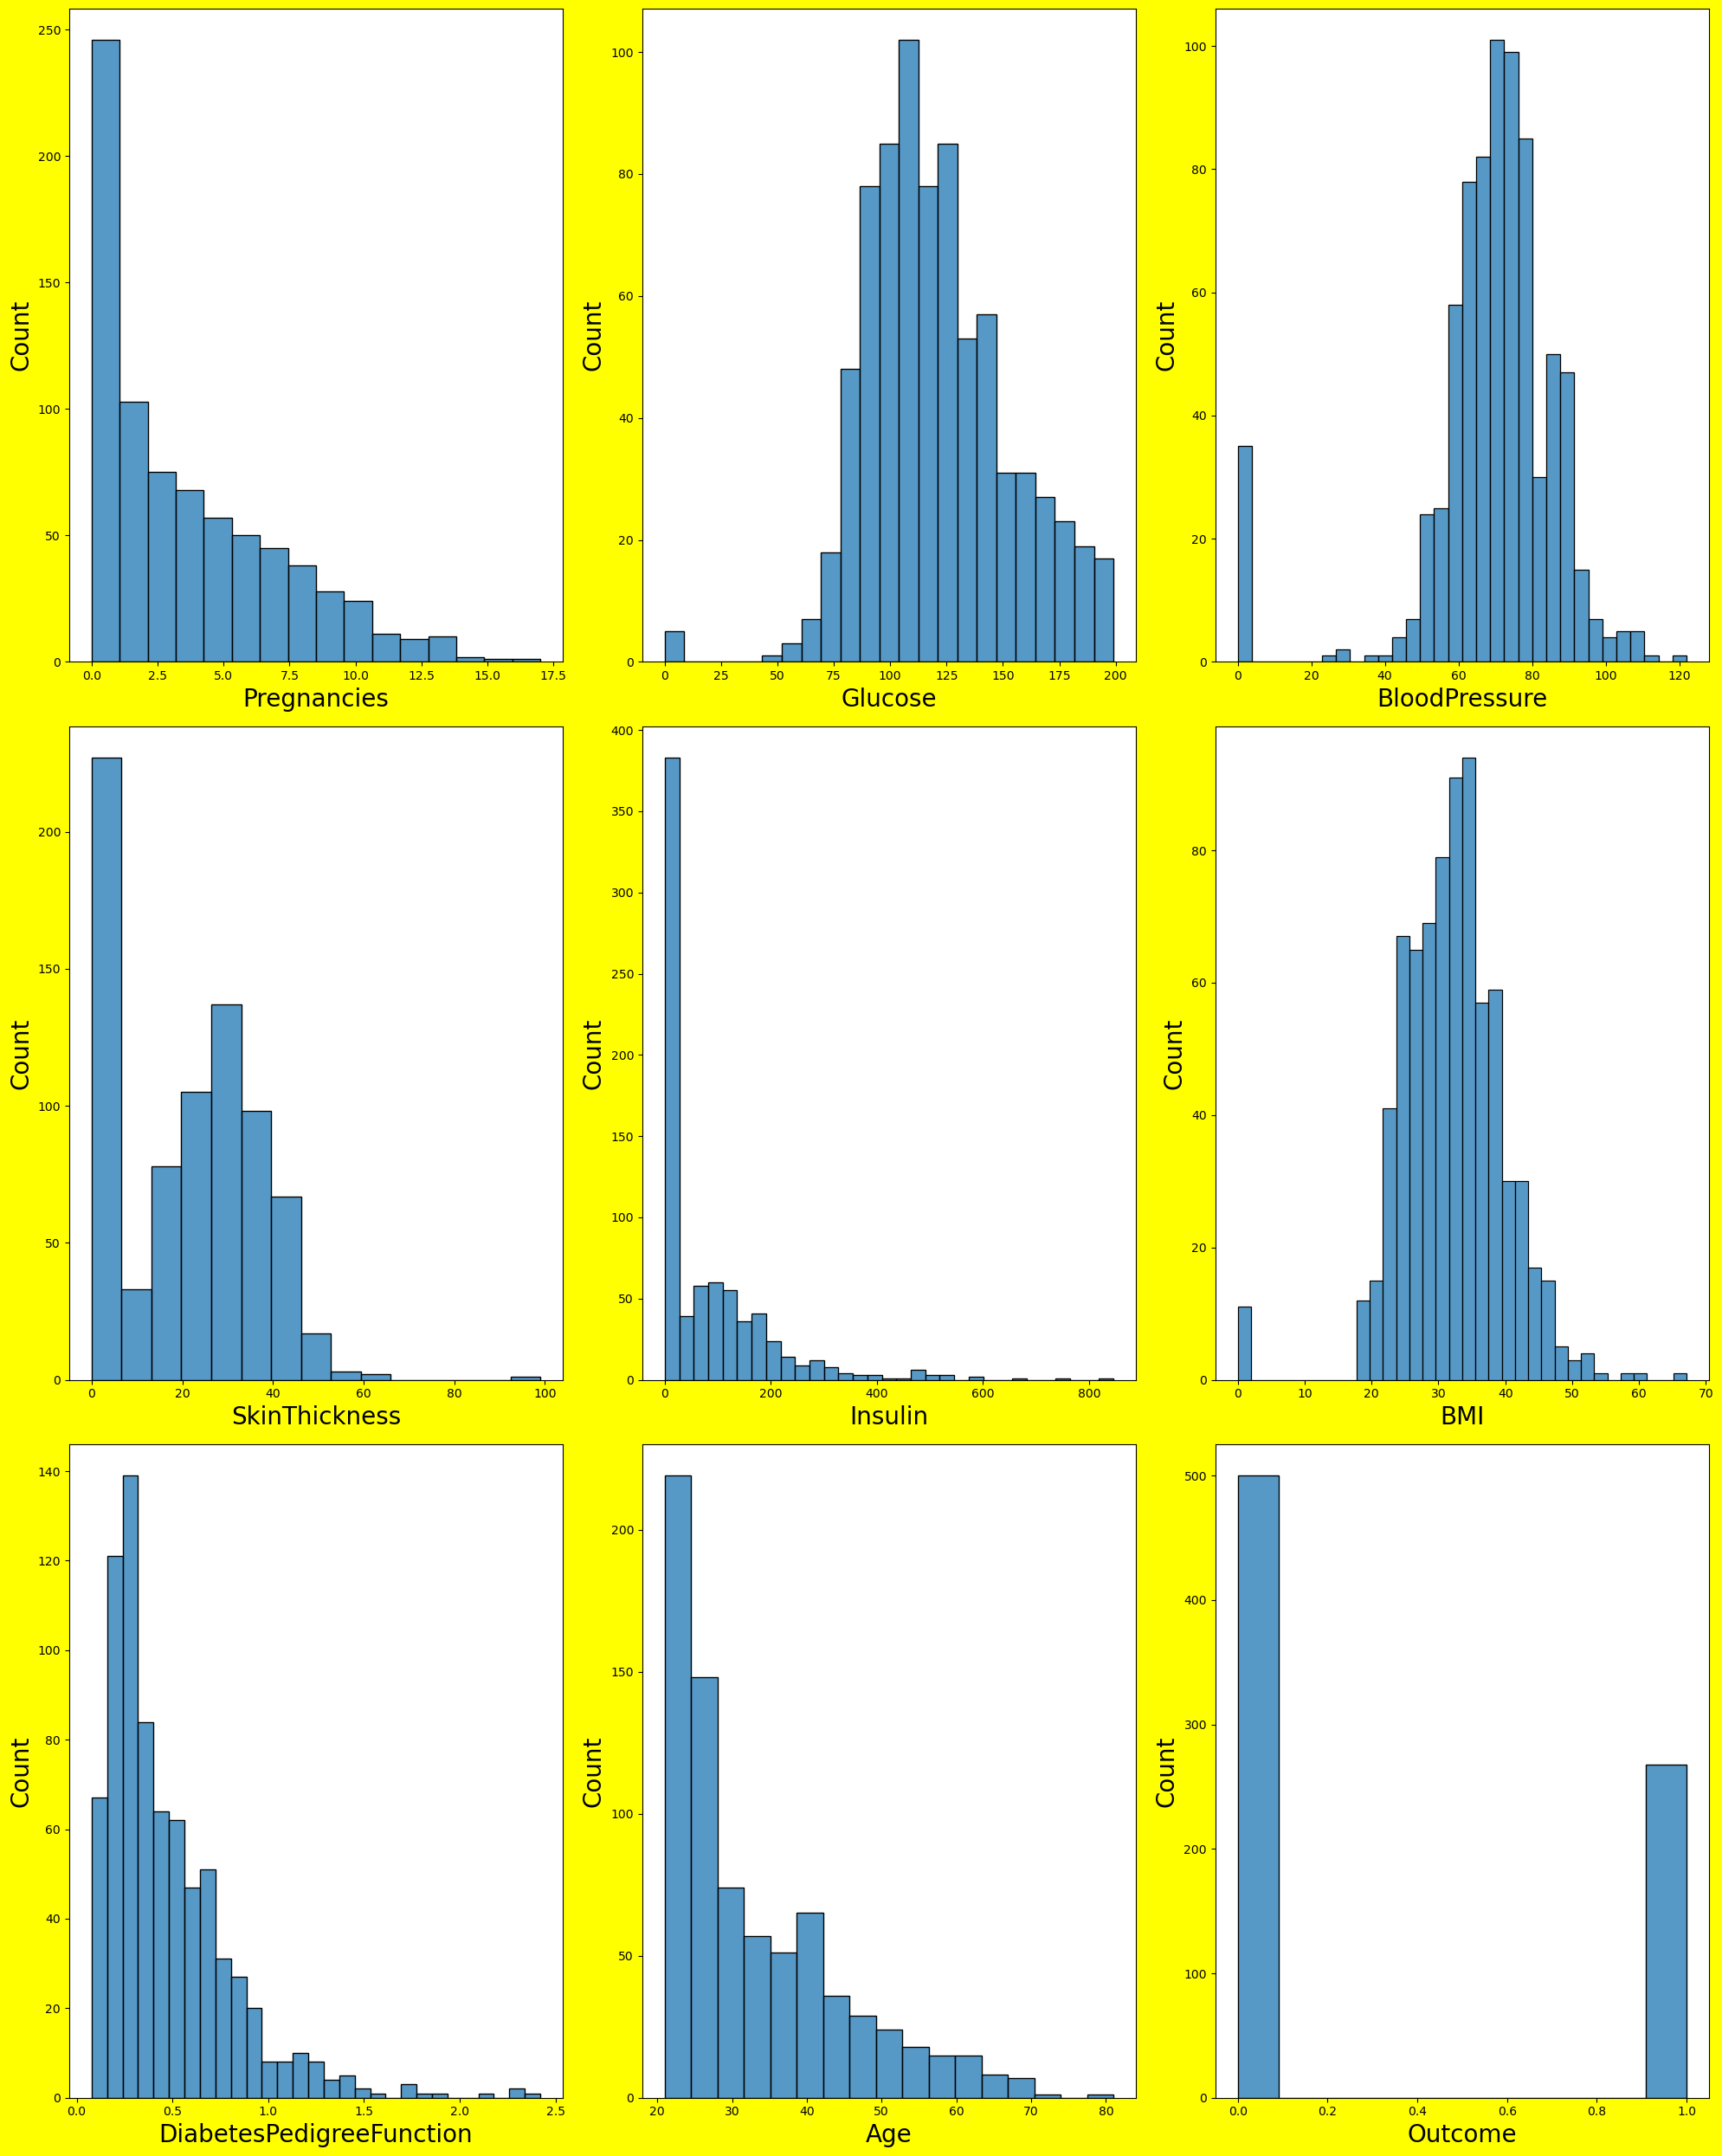

In [11]:
plt.figure(figsize=(20,25),facecolor='yellow')

plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()
    

In [12]:
for column in data:
    print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


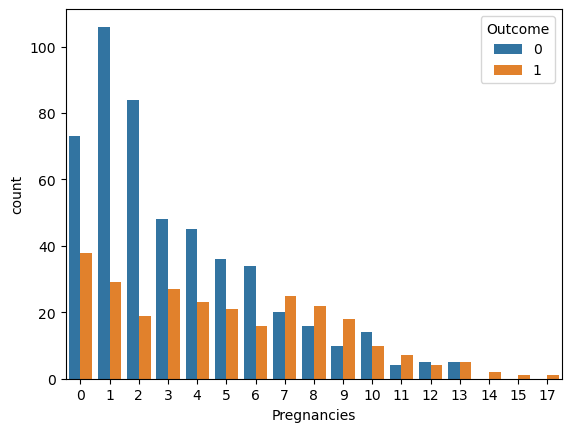

In [7]:
##Bivariate Analysis refers to plots between input variables and target variable.

## Analyzing how preganancies impact the patient with diabetes.
sns.countplot(x='Pregnancies',hue='Outcome',data=data)
plt.show()

<Axes: xlabel='Glucose', ylabel='Count'>

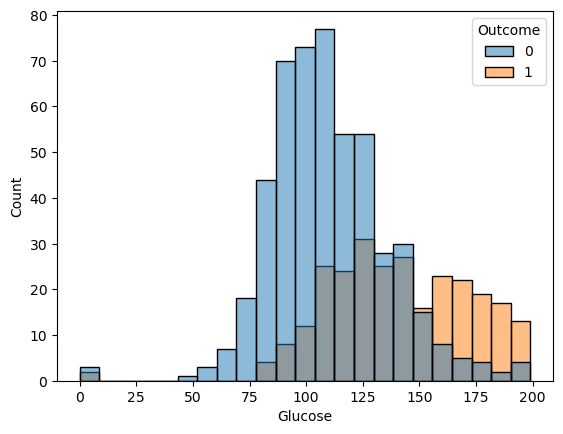

In [14]:
## Aanlyzing the relationship between diabetes and Glucose
sns.histplot(x='Glucose',hue='Outcome',data=data)


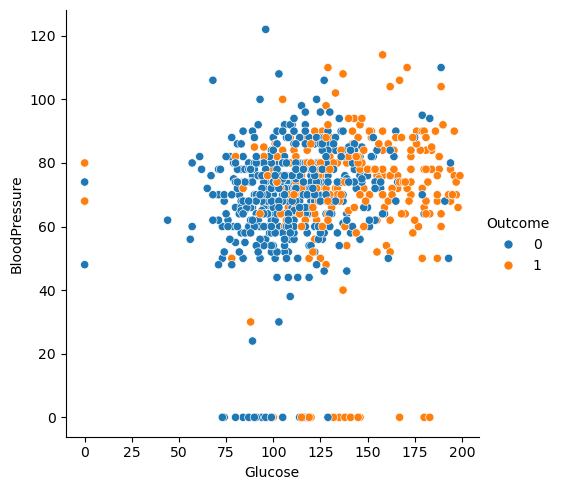

In [15]:
## Analyze Glucose with blood pressure

sns.relplot(x='Glucose',y='BloodPressure',hue='Outcome',data=data)
plt.show()

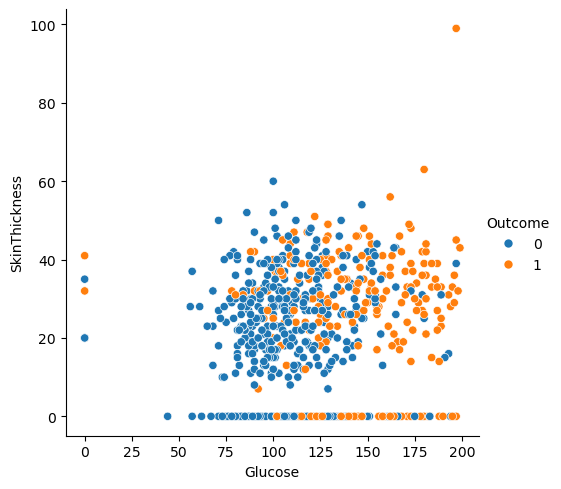

In [16]:
## Analyze Glucose with SkinThickness

sns.relplot(x='Glucose',y='SkinThickness',hue='Outcome',data=data)
plt.show()

<Axes: xlabel='BloodPressure', ylabel='Count'>

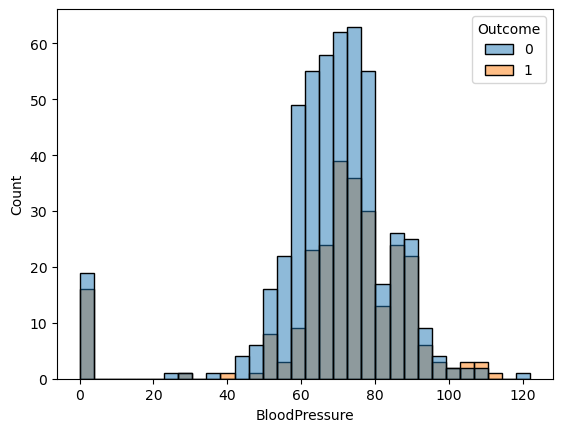

In [17]:
## Analyze relationship between BloodPressure and Outcome

sns.histplot(x='BloodPressure',hue='Outcome',data=data)

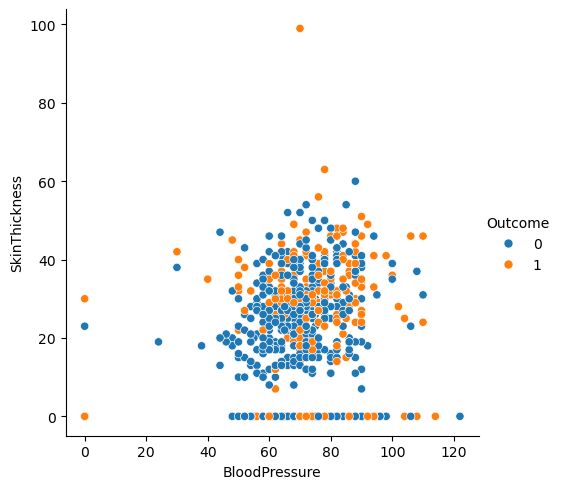

In [18]:
## Analyze BP with SkinThickness

sns.relplot(x='BloodPressure',y='SkinThickness',hue='Outcome',data=data)
plt.show()

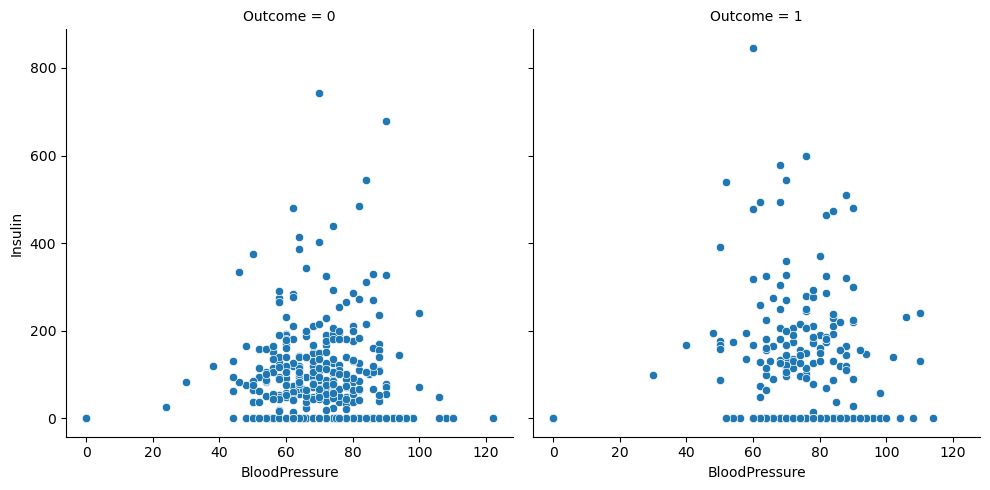

In [19]:
## Analyze BP with Insulin

sns.relplot(x='BloodPressure',y='Insulin',col='Outcome',data=data)
plt.show()

<Axes: xlabel='Insulin', ylabel='Count'>

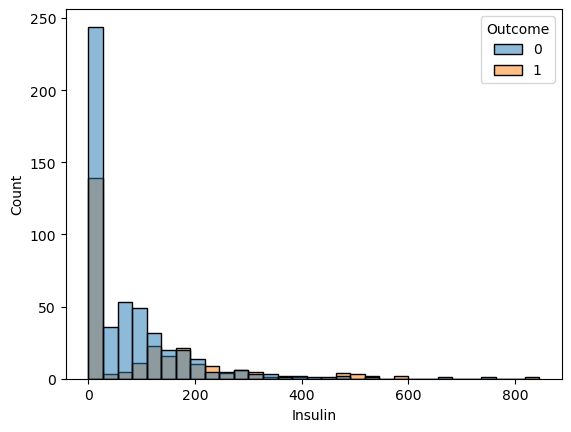

In [20]:
## Analyzing Insulin with target
sns.histplot(x='Insulin',hue='Outcome',data=data)

## Data Preprocessing and Feature Engineering.

In [21]:
#Step 1 Handling the missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
## Step 2 Handling the corrupted data.
## In 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI' certain datapoints are zero.
data.Glucose.replace(0,np.median(data.Glucose),inplace=True)
data.loc[data['Glucose']==0]
#dataframe.colum.replace('Value to be replaced','By what value')


C:\Users\Datamites\AppData\Local\Temp\ipykernel_13488\742608350.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Glucose.replace(0,np.median(data.Glucose),inplace=True)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [23]:
data.loc[data['BMI']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [9]:
data.BloodPressure.replace(0,np.median(data.BloodPressure),inplace=True)
data.SkinThickness.replace(0,np.median(data.SkinThickness),inplace=True)
data.Insulin.replace(0,np.median(data.Insulin),inplace=True)
data.BMI.replace(0,np.median(data.BMI),inplace=True)

C:\Users\Datamites\AppData\Local\Temp\ipykernel_13488\3549150814.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.BloodPressure.replace(0,np.median(data.BloodPressure),inplace=True)
C:\Users\Datamites\AppData\Local\Temp\ipykernel_13488\3549150814.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [10]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1


In [25]:
## Step 3:-Numerical representation of string data

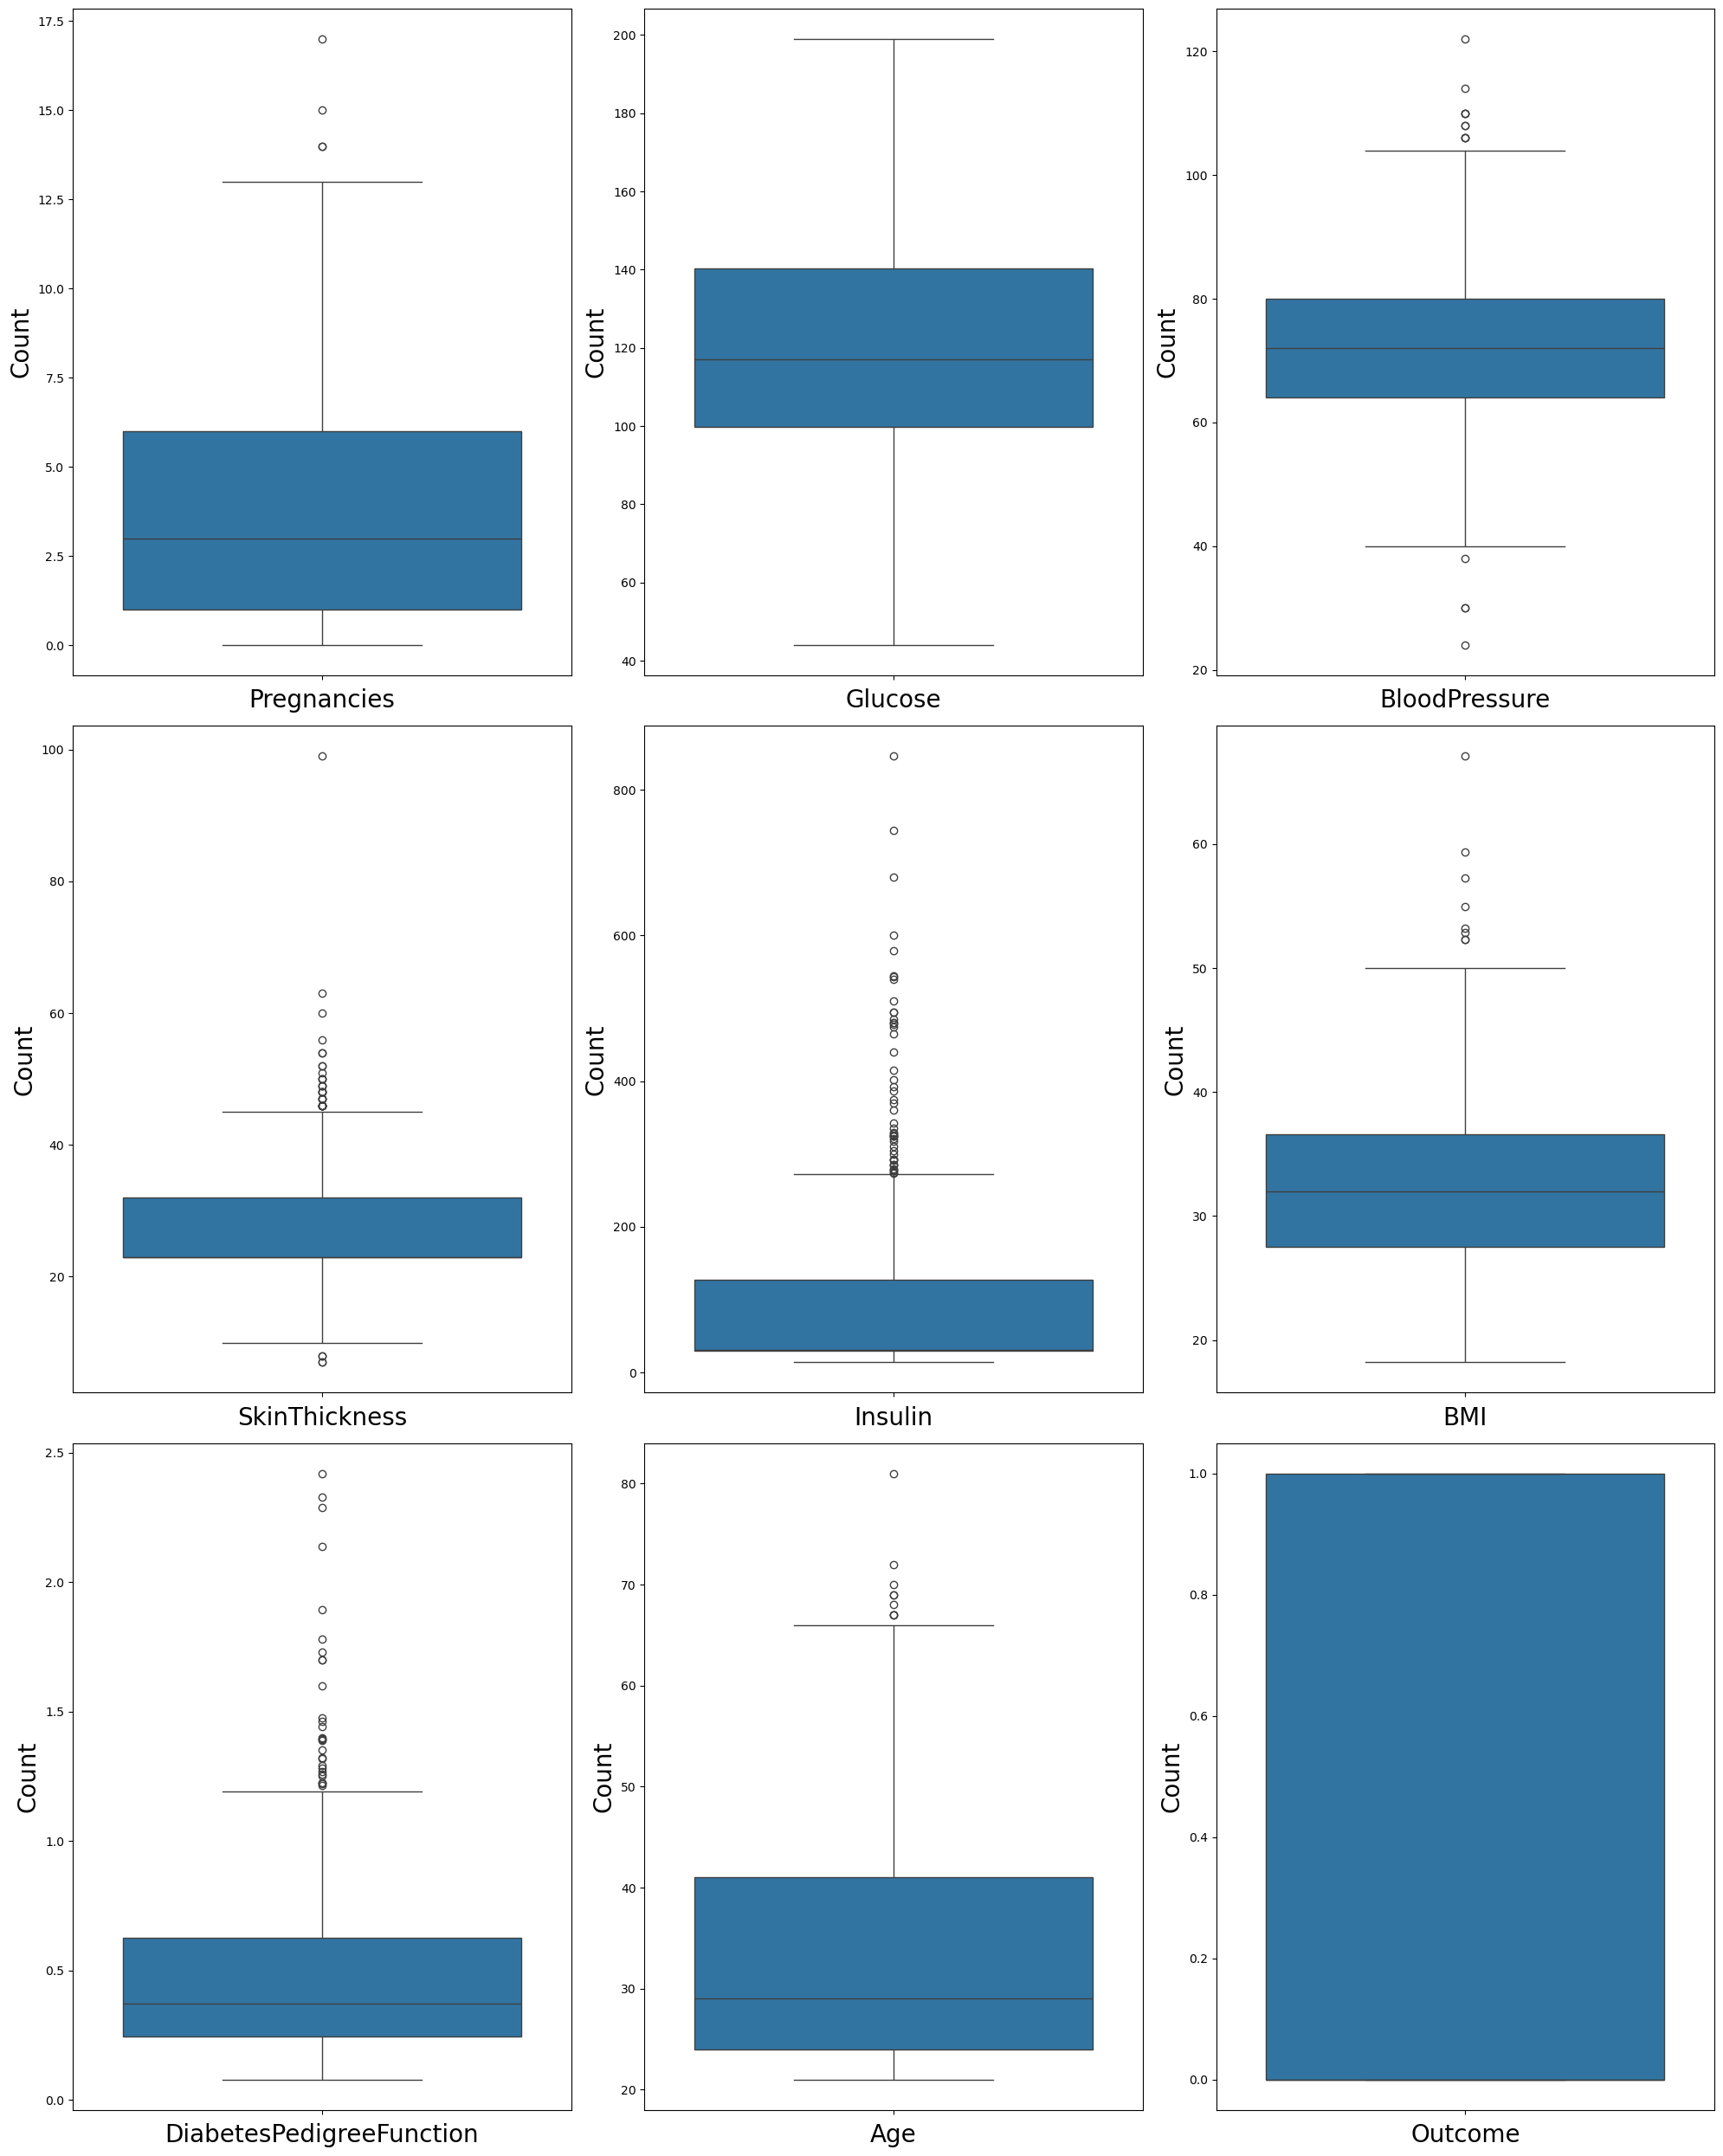

In [26]:
## Step 4:-Checking the outliers
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [11]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [12]:
# Step 5:-Scaling the data

from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
dl=['Pregnancies','Outcome']
data1=sc.fit_transform(data.drop(dl,axis=1))


In [13]:
data1

array([[0.67096774, 0.48979592, 0.30434783, ..., 0.31492843, 0.23441503,
        0.48333333],
       [0.26451613, 0.42857143, 0.23913043, ..., 0.17177914, 0.11656704,
        0.16666667],
       [0.89677419, 0.40816327, 0.17391304, ..., 0.10429448, 0.25362938,
        0.18333333],
       ...,
       [0.49677419, 0.48979592, 0.17391304, ..., 0.16359918, 0.07130658,
        0.15      ],
       [0.52903226, 0.36734694, 0.17391304, ..., 0.24335378, 0.11571307,
        0.43333333],
       [0.31612903, 0.46938776, 0.26086957, ..., 0.24948875, 0.10119556,
        0.03333333]])

In [14]:
con_data=data[['Pregnancies','Outcome']]


In [15]:
con_data

,Pregnancies,Outcome
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1
...,...,...
763,10,0
764,2,0
765,5,0
766,1,1


In [16]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [33]:
# type(data)
data2=pd.DataFrame(data,columns=['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [34]:
data2.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [35]:
# from sklearn.preprocessing import MinMaxScaler
# sc=MinMaxScaler()
# # dl=['Pregnancies','Outcome']
# data1=sc.fit_transform(data2) #.drop(dl,axis=1))


In [17]:
type(data1)

numpy.ndarray

In [18]:
nD=pd.DataFrame(data1,columns=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [19]:
nD

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333
1,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667
2,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333
3,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000
...,...,...,...,...,...,...,...
763,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000
764,0.503226,0.469388,0.217391,0.019832,0.380368,0.111870,0.100000
765,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000
766,0.529032,0.367347,0.173913,0.019832,0.243354,0.115713,0.433333


In [20]:
final_df=pd.concat([nD,con_data],axis=1)

In [21]:
final_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333,6,1
1,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667,1,0
2,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333,8,1
3,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,1,0
4,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,0,1
...,...,...,...,...,...,...,...,...,...
763,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,10,0
764,0.503226,0.469388,0.217391,0.019832,0.380368,0.111870,0.100000,2,0
765,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000,5,0
766,0.529032,0.367347,0.173913,0.019832,0.243354,0.115713,0.433333,1,1


## Feature  Selection

In [41]:
data2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63
764,2,122,70,27,30.5,36.8,0.340,27
765,5,121,72,23,112.0,26.2,0.245,30
766,1,126,60,23,30.5,30.1,0.349,47


<Axes: >

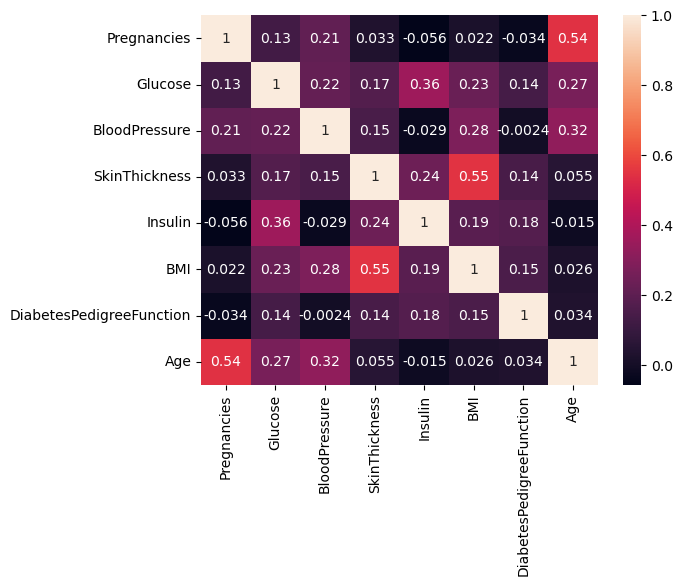

In [42]:
## No redundant fetaures
## We will check correlation
sns.heatmap(data2.corr(),annot=True)

# So no correlation hence no features should be 

## Model Creation

In [43]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1


In [79]:
# X=data.iloc[:,:-1]
# X=X.iloc[:,1:]

In [80]:
# X

In [78]:
# y=data.iloc[:,-1]
# y

In [22]:
final_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333,6,1
1,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667,1,0
2,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333,8,1
3,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,1,0
4,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,0,1
...,...,...,...,...,...,...,...,...,...
763,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,10,0
764,0.503226,0.469388,0.217391,0.019832,0.380368,0.111870,0.100000,2,0
765,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000,5,0
766,0.529032,0.367347,0.173913,0.019832,0.243354,0.115713,0.433333,1,1


In [23]:
## Step 1 Creating independent and dependent variable.

X=final_df.iloc[:,:-1]
y=final_df.Outcome

In [82]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [25]:
## Step 2 Creating training and testing data.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=45)

In [84]:
y_test

195    1
51     0
66     1
437    0
665    0
      ..
671    0
422    0
742    0
331    0
699    0
Name: Outcome, Length: 192, dtype: int64

In [26]:
## Step 3 Model creation
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train,y_train)  ## training

LogisticRegression()

In [27]:
## Step 4 Prediction
y_pred=clf.predict(X_test)

In [28]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [29]:
y_pred_prob=clf.predict_proba(X_test)

In [30]:
y_pred_prob

array([[0.33762324, 0.66237676],
       [0.90132681, 0.09867319],
       [0.74053506, 0.25946494],
       [0.53932945, 0.46067055],
       [0.81050184, 0.18949816],
       [0.85452464, 0.14547536],
       [0.54470744, 0.45529256],
       [0.92418132, 0.07581868],
       [0.36208971, 0.63791029],
       [0.91502126, 0.08497874],
       [0.24459556, 0.75540444],
       [0.53501713, 0.46498287],
       [0.9424171 , 0.0575829 ],
       [0.43973824, 0.56026176],
       [0.73488609, 0.26511391],
       [0.90451066, 0.09548934],
       [0.06523829, 0.93476171],
       [0.60862245, 0.39137755],
       [0.38214949, 0.61785051],
       [0.91377144, 0.08622856],
       [0.65553954, 0.34446046],
       [0.7171945 , 0.2828055 ],
       [0.57403592, 0.42596408],
       [0.82533209, 0.17466791],
       [0.79867268, 0.20132732],
       [0.3645728 , 0.6354272 ],
       [0.85756311, 0.14243689],
       [0.33523088, 0.66476912],
       [0.226471  , 0.773529  ],
       [0.83260536, 0.16739464],
       [0.

In [90]:
data.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,recall_score

In [ ]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

In [ ]:
print("The accuracy score is : ", accuracy_score(y_test,y_pred))

In [ ]:
recall=recall_score(y_test,y_pred)
recall

In [ ]:
precision=precision_score(y_test,y_pred)
precision

In [ ]:
cr=classification_report(y_test,y_pred)
print(cr)

## Evaluation of Model

## Evaluation of a Classification Model

In machine learning, once we have a result of the classification problem, how do we measure how accurate our classification is?
For a  regression problem, we have different metrics like R Squared score, Mean Squared Error etc. what are the metrics to measure the credibility of a classification model?

Metrics
In a regression problem, the accuracy is generally measured in terms of the difference in the actual values and the predicted values.
In a classification problem, the credibility of the model is measured using the confusion matrix generated, i.e., how accurately the true positives and true negatives were predicted.
The different metrics used for this purpose are:
- Accuracy
- Recall
- Precision
- F1 Score
- Specifity
- AUC( Area Under the Curve)
- ROC(Receiver Operator Characteristic)
- Classification Report

### Confusion Matrix

A typical confusion matrix looks like the figure shown.

<img src="confusionMatrix.PNG" width="300">

Where the terms have the meaning:

	__True Positive(TP):__ A result that was predicted as positive by the classification model and also is positive

	__True Negative(TN):__ A result that was predicted as negative by the classification model and also is negative

	__False Positive(FP):__ A result that was predicted as positive by the classification model but actually is negative

	__False Negative(FN):__ A result that was predicted as negative by the classification model but actually is positive.

The Credibility of the model is based on how many correct predictions did the model do.

### Accuracy
The mathematical formula is :

   __Accuracy__= $ \frac{ (TP+TN)}{(TP+TN+FP+FN)} $
    
Or, it can be said that it’s defined as the total number of correct classifications divided by the total number of classifications.
Its is not the correct for inbalanc data beacause its always show you high accurancy becoz its bais to the high count data in binary classification
becoz its not calculate the error / its won't count the error 

#### Recall or Sensitivity
The mathematical formula is:

   __Recall__= $ \frac{ TP}{(TP+FN)} $

Or, as the name suggests, it is a measure of: from the total number of positive results how many positives were correctly predicted by the model.

It shows how relevant the model is, in terms of positive results only.

Consider a classification model , the model gave 50 correct predictions(TP) but failed to identify 200 cancer patients(FN). Recall in that case will be:

Recall=$ \frac {50}{(50+200)} $= 0.2 (The model was able to recall only 20% of the cancer patients)


### Precision

Precision is a measure of amongst all the positive predictions, how many of them were actually positive. Mathematically,

Precision=$ \frac {TP}{(TP+FP)} $

Let’s suppose in the previous example, the model identified 50 people as cancer patients(TP) but also raised a  false alarm for 100 patients(FP). Hence,

Precision=$ \frac {50}{(50+100)} $=0.33 (The model only has a precision of 33%)


### But we have a problem!!

As evident from the previous example, the model had a very high Accuracy but performed poorly in terms of Precision and Recall. So, necessarily _Accuracy_ is not the metric to use for evaluating the model in this case.

Imagine a scenario, where the requirement was that the model recalled all the defaulters who did not pay back the loan. Suppose there were 10 such defaulters and to recall those 10 defaulters, and the model gave you 20 results out of which only the 10 are the actual defaulters. Now, the recall of the model is 100%, but the precision goes down to 50%.








### A Trade-off?

<img src="tradeoff.PNG" width="300">

As observed from the graph, with an increase in the Recall, there is a drop in Precision of the model.

So the question is - what to go for? Precision or Recall?

Well, the answer is: it depends on the business requirement.

For example, if you are predicting cancer, you need a 100 % recall. But suppose you are predicting whether a person is innocent or not, you need 100% precision.

Can we maximise both at the same time? No

So, there is a need for a better metric then?

Yes. And it’s called an _F1 Score_


### F1 Score

From the previous examples, it is clear that we need a metric that considers both Precision and Recall for evaluating a model. One such metric is the F1 score.

F1 score is defined as the harmonic mean of Precision and Recall. 

The mathematical formula is:
        F1 score= $ \frac {2*((Precision*Recall)}{(Precision+Recall))} $


### Specificity or True Negative Rate

This represents how specific is the model while predicting the True Negatives.
Mathematically,

   Specificity=$ \frac {TN}{(TN+FP)} $
Or, it can be said that it quantifies the total number of negatives predicted by the model with respect to the total number of actual negative or non favorable outcomes.

Similarly, False Positive rate can be defined as:  (1- specificity)
Or,  $ \frac {FP}{(TN+FP)} $


### ROC(Receiver Operator Characteristic)

We know that the classification algorithms work on the concept of probability of occurrence of the possible outcomes. A probability value lies between 0 and 1. Zero means that there is no probability of occurrence and one means that the occurrence is certain.

But while working with real-time data, it has been observed that we seldom get a perfect 0 or 1 value. Instead of that, we get different decimal values lying between 0 and 1. Now the question is if we are not getting binary probability values how are we actually determining the class in our classification problem?

There comes the concept of Threshold. A threshold is set, any probability value below the threshold is a negative outcome, and anything more than the threshold is a favourable or the positive outcome. For Example, if the threshold is 0.5, any probability value below 0.5 means a negative or an unfavourable outcome and any value above 0.5 indicates a positive or favourable outcome. 

Now, the question is, what should be an ideal threshold?


The following diagram shows a typical logistic regression curve.
<img src="logisticRegression.PNG" width="300">

* The horizontal lines represent the various values of thresholds ranging from 0 to 1.
* Let’s suppose our classification problem was to identify the obese people from the given data.
* The green markers represent obese people and the red markers represent the non-obese people.
* Our confusion matrix will depend on the value of the threshold chosen by us.
* For Example, if 0.25 is the threshold then
        TP(actually obese)=3
        TN(Not obese)=2
        FP(Not obese but predicted obese)=2(the two red squares above the 0.25 line)
        FN(Obese but predicted as not obese )=1(Green circle below 0.25line  )


A typical ROC curve looks like the following figure.
<img src="ROC.PNG" width="300">

* Mathematically, it represents the various confusion matrices for various thresholds. Each black dot is one confusion matrix.
* The green dotted line represents the scenario when the true positive rate equals the false positive rate.
* As evident from the curve, as we move from the rightmost dot towards left, after a certain threshold, the false positive rate decreases.
* After some time, the false positive rate becomes zero.
* The point encircled in green is the best point as it predicts all the values correctly and keeps the False positive as a minimum.
* But that is not a rule of thumb. Based on the requirement, we need to select the point of a threshold.
* The ROC curve answers our question of which threshold to choose.


### But we have a confusion!!

Let’s suppose that we used different classification algorithms, and different ROCs for the corresponding algorithms have been plotted.
The question is: which algorithm to choose now?
The answer is to calculate the area under each ROC curve.

#### AUC(Area Under Curve)

<img src="AUC.PNG" width="300">

* It helps us to choose the best model amongst the models for which we have plotted the ROC curves
* The best model is the one which encompasses the maximum area under it.
* In the adjacent diagram, amongst the two curves, the model that resulted in the red one should be chosen as it clearly covers more area than the blue one


#### When to use recall and when to you precision

* We have thousands of free customers registering in our website every week. The call center team wants to call them all, but it is imposible, so they ask me to select those with good chances to be a buyer (with high temperature is how we refer to them). We don't care to call a guy that is not going to buy (so precision is not important) but for us is very important that all of them with high temperature are always in my selection, so they don't go without buying. That means that my model needs to have a high recall, no matter if the precision goes to hell.



In [91]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [92]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[113  17]
 [ 31  31]]


In [93]:
recall=recall_score(y_test,y_pred)
recall

0.5

In [94]:
precision=precision_score(y_test,y_pred)
precision

0.6458333333333334

In [95]:
f1score=f1_score(y_test,y_pred)
f1score

0.5636363636363636

In [96]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       130
           1       0.65      0.50      0.56        62

    accuracy                           0.75       192
   macro avg       0.72      0.68      0.69       192
weighted avg       0.74      0.75      0.74       192



In [97]:
y_test.value_counts()

Outcome
0    130
1     62
Name: count, dtype: int64

# Multiclass Classification

In [64]:
df=pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris.csv')

In [65]:
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [66]:
# Model Creation

X=df.iloc[:,:-1]
y=df.Name

In [67]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Name, Length: 150, dtype: object

In [68]:
## Training and testing data

X_train1,X_test1,y_train,y_test=train_test_split(X,y,random_state=25)

In [69]:
X_train1

,SepalLength,SepalWidth,PetalLength,PetalWidth
23,5.1,3.3,1.7,0.5
35,5.0,3.2,1.2,0.2
16,5.4,3.9,1.3,0.4
0,5.1,3.5,1.4,0.2
8,4.4,2.9,1.4,0.2
...,...,...,...,...
118,7.7,2.6,6.9,2.3
61,5.9,3.0,4.2,1.5
143,6.8,3.2,5.9,2.3
62,6.0,2.2,4.0,1.0


In [70]:
lr_multi=LogisticRegression()
lr_multi.fit(X_train1,y_train)
y_pred=lr_multi.predict(X_test1)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[11  0  0]
 [ 0 15  1]
 [ 0  0 11]]


In [72]:
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [73]:
y_test

28         Iris-setosa
72     Iris-versicolor
70     Iris-versicolor
85     Iris-versicolor
128     Iris-virginica
65     Iris-versicolor
127     Iris-virginica
42         Iris-setosa
81     Iris-versicolor
93     Iris-versicolor
21         Iris-setosa
31         Iris-setosa
26         Iris-setosa
133     Iris-virginica
6          Iris-setosa
58     Iris-versicolor
125     Iris-virginica
139     Iris-virginica
64     Iris-versicolor
94     Iris-versicolor
79     Iris-versicolor
99     Iris-versicolor
66     Iris-versicolor
20         Iris-setosa
34         Iris-setosa
117     Iris-virginica
69     Iris-versicolor
122     Iris-virginica
120     Iris-virginica
41         Iris-setosa
54     Iris-versicolor
113     Iris-virginica
135     Iris-virginica
4          Iris-setosa
115     Iris-virginica
52     Iris-versicolor
68     Iris-versicolor
40         Iris-setosa
Name: Name, dtype: object

In [74]:
recall=recall_score(y_test,y_pred,average='weighted')
recall

0.9736842105263158

In [75]:
precision=precision_score(y_test,y_pred,average='weighted')
precision

0.975877192982456

In [76]:
f1score=f1_score(y_test,y_pred,average='weighted')
f1score

0.973831844688861

In [77]:
cr=classification_report(y_test,y_pred)
print(cr)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [ ]:
recall=recall_score(y_test,y_pred,average='weighted')
recall

precision=precision_score(y_test,y_pred,average='weighted')
precision

cr=classification_report(y_test,y_pred)
print(cr)